In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Functions import *

In [2]:
filename = "./results/Scanning_L_lower_and_gapx_2_sliced.csv"

In [3]:
Beta_Upper_ring = 5983.180936564255       # L_inner = 2.8um

In [4]:
Y_data      = ()
gap_arr     = []
L_arr       = []
data_arr    = []
data_arr_zero_loc_list = []

In [5]:
df              = pd.read_csv(filename)
gap_arr         = df["gap/L_lower"]
num_of_gap_pts  = len(gap_arr)

In [6]:

# wavl_arr_ori    = wavl_arr[xticks_ori]
# wavl_arr_ticks  = ["{:.3f}".format(wavl) for wavl in wavl_arr_ori]

for column in df.columns[1:]:
    L       = float(column)
    L_arr.append(L)
    data_arr.append(df[column]-Beta_Upper_ring)

data_arr = np.array(data_arr)

for i in range(np.shape(data_arr)[0]):
    line = data_arr[i,:]

    for j in range(len(line)-1):
        if line[j] * line[j+1] < 0:
            shift = np.abs(line[j])/(np.abs(line[j])+np.abs(line[j+1]))
            data_arr_zero_loc_list.append([i,L_arr[i],j+shift])

# data_arr_neg_mask = np.where(data_arr<0)
# data_arr[data_arr_neg_mask] = -np.log10(-data_arr[data_arr_neg_mask])
# data_arr_neg_mask = np.where(data_arr>0)
# data_arr[data_arr_neg_mask] = np.log10(data_arr[data_arr_neg_mask])

num_of_L_pts    = len(L_arr)
xticks_ori      = np.arange(0,num_of_L_pts,1)

data_arr_zero_loc_list = np.array(data_arr_zero_loc_list)
data_arr_zero_loc_list

array([[ 5.        ,  3.        ,  3.84076744],
       [ 6.        ,  3.1       ,  7.80683076],
       [ 7.        ,  3.2       , 11.51057065],
       [ 8.        ,  3.3       , 14.97406858]])

In [7]:
width_arr_intp  = np.linspace(4,9,20)
phase_matched_gap_intp = Interpol(data_arr_zero_loc_list[:,0],
                                  data_arr_zero_loc_list[:,2],
                                  width_arr_intp)

In [8]:
np.arange(0,num_of_L_pts,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

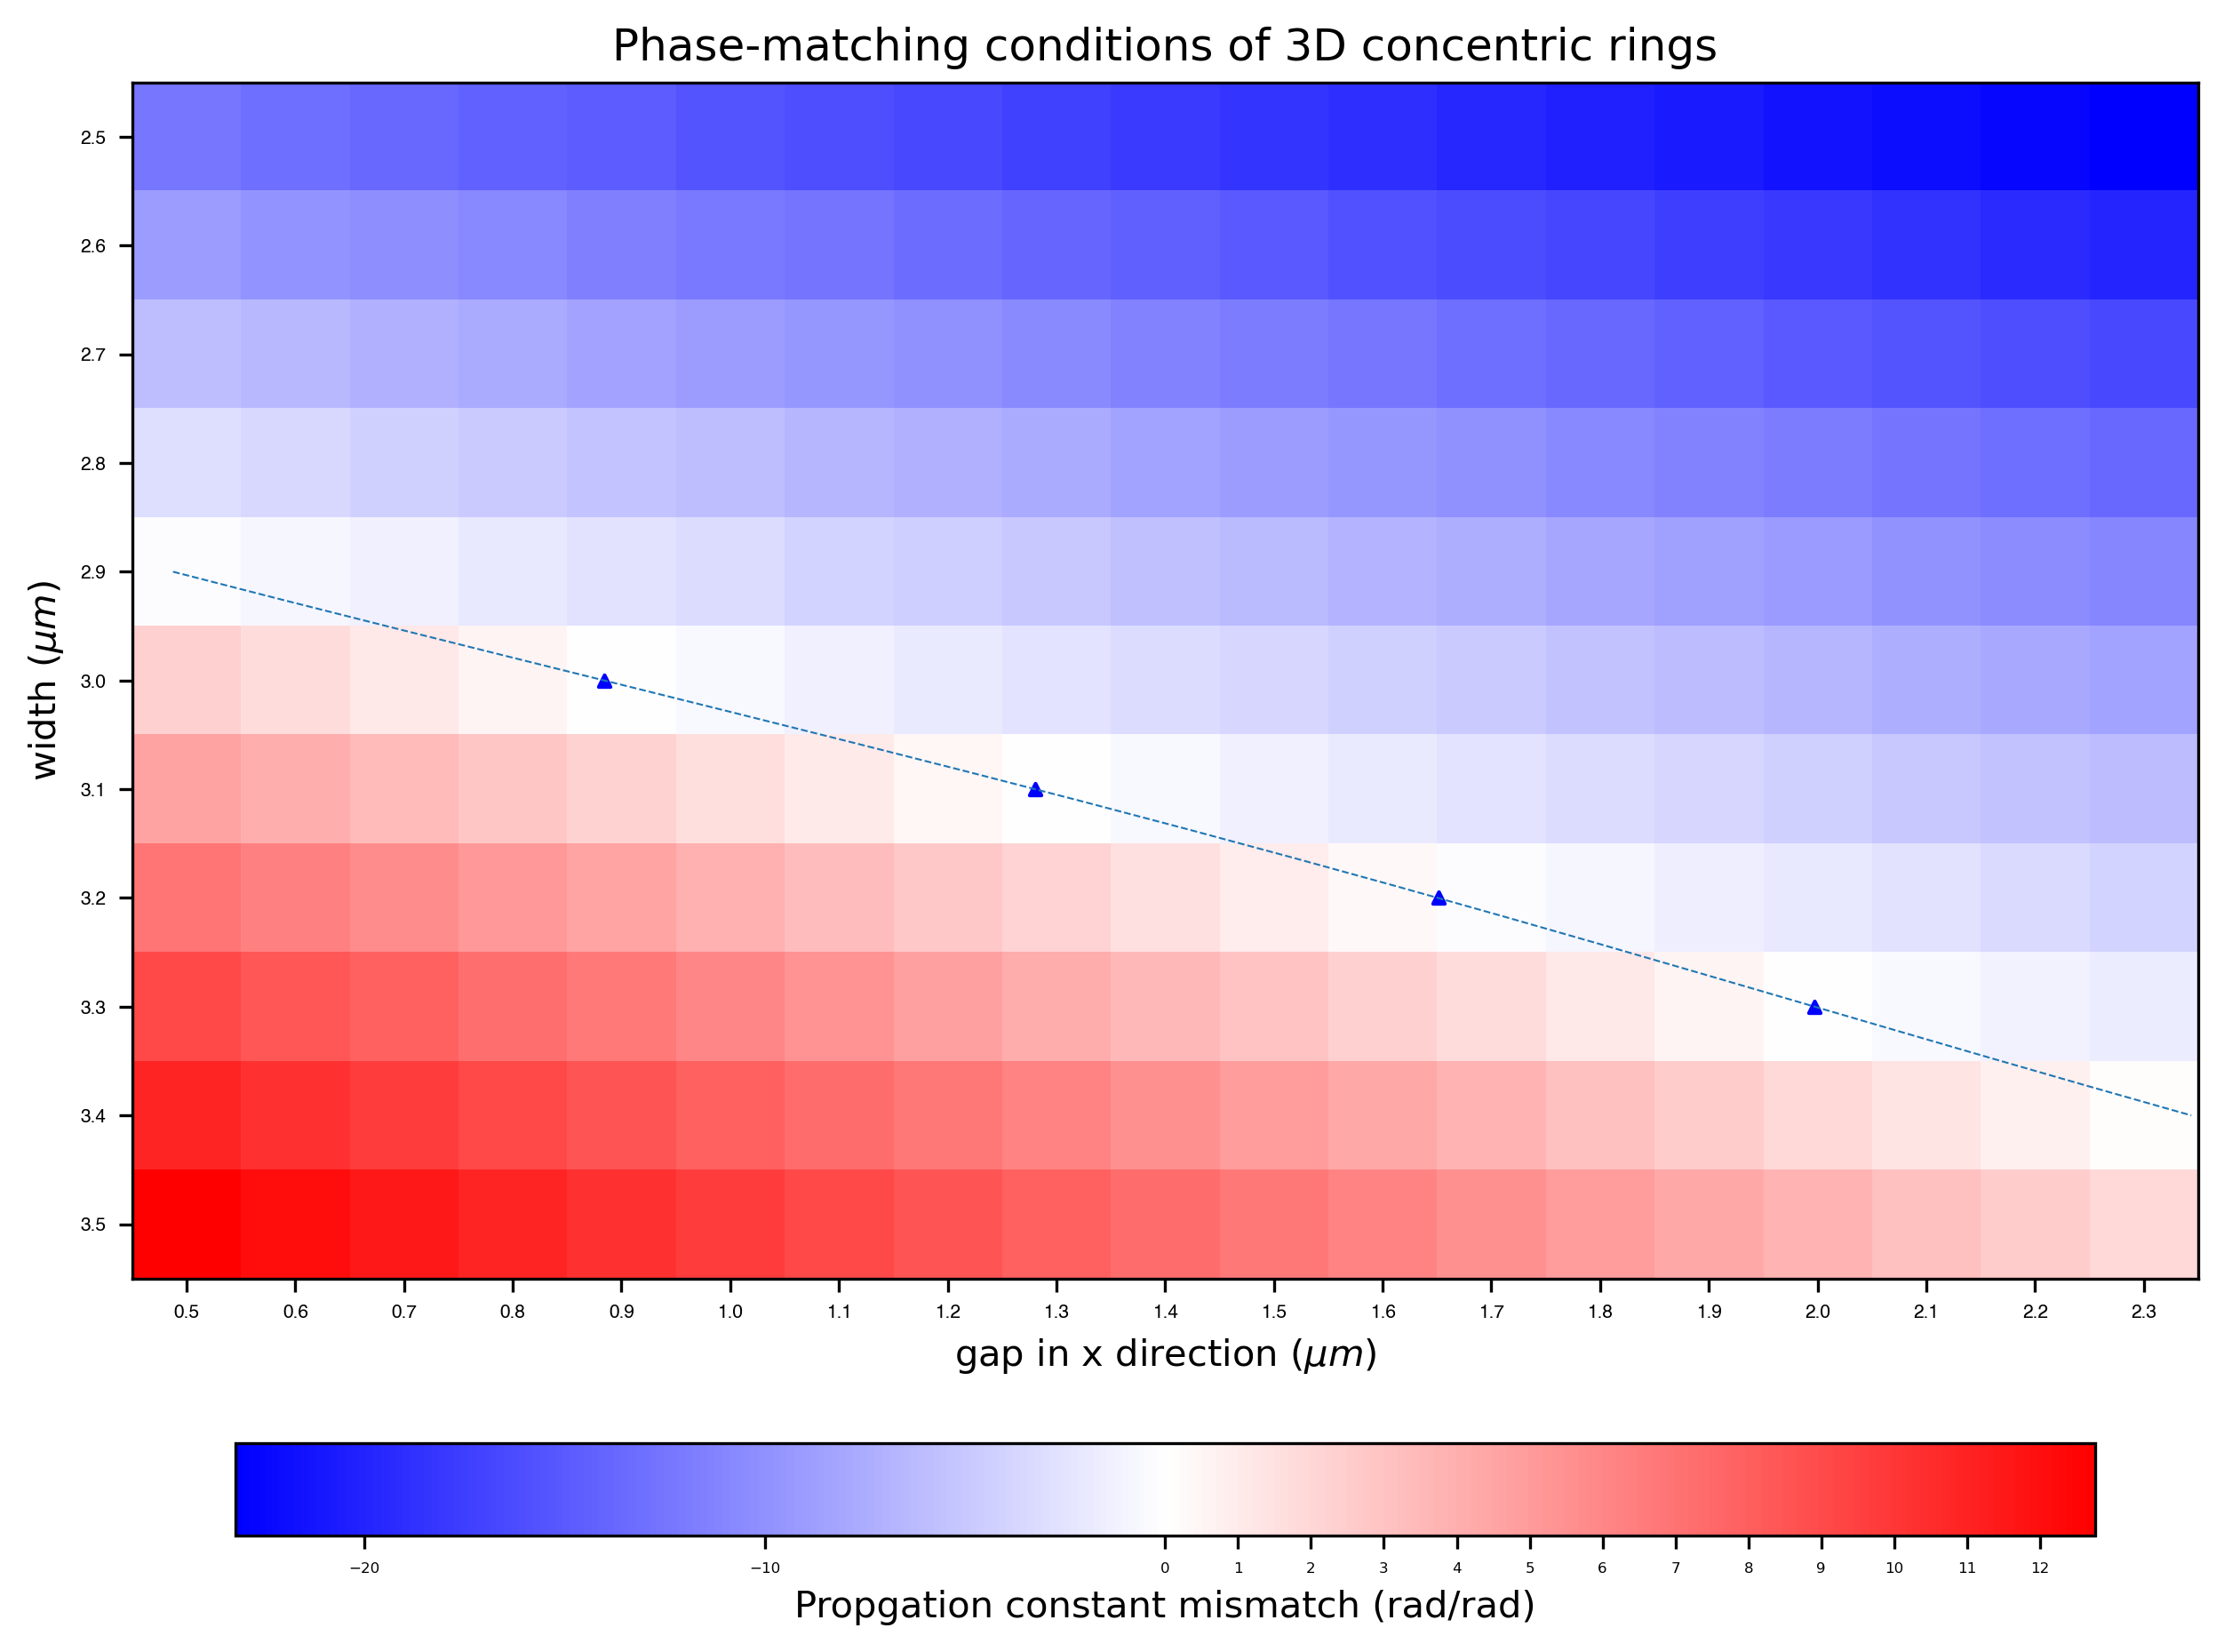

In [9]:
from matplotlib.colors import TwoSlopeNorm
fonttype = "Helvetica"
fontsize = 5
colormap = "bwr"
# colormap = "berlin"
figsize  = (10,8)
cbar_num_of_pts = 6
norm    = TwoSlopeNorm(vmin=np.min(data_arr), vcenter=0, vmax=np.max(data_arr))

fig, ax = plt.subplots(figsize=figsize,dpi=300)
im      = ax.imshow(data_arr, cmap = colormap, norm = norm, aspect=1)
# ax.plot(np.arange(0,num_of_wavl_pts,1),1*np.ones(num_of_wavl_pts))
ax.scatter(data_arr_zero_loc_list[:,2],data_arr_zero_loc_list[:,0], s=10, c='b', marker='^',)
plt.plot(phase_matched_gap_intp,width_arr_intp, linewidth=0.5, linestyle = "--")

cbar = fig.colorbar(im, ax=ax, orientation='horizontal',
                    shrink=0.9, pad=0.1)  # shrink: 缩放比例，pad: 间距
cbar.set_ticks(ticks_arr(data_arr))
cbar.ax.tick_params(labelsize=fontsize*0.8)
# cbar.set_label(r"sgn(D) $\log_{10}$($|D|$)")
cbar.set_label(r"Propgation constant mismatch (rad/rad)")

plt.xticks(np.arange(0,num_of_gap_pts,1),gap_arr,fontproperties = fonttype, size = fontsize)
plt.yticks(np.arange(0,num_of_L_pts,1),L_arr,fontproperties = fonttype, size = fontsize)
plt.xlabel(r"gap in x direction ($\mu m$)")
plt.ylabel(r"width ($\mu m$)")
title = "Phase-matching conditions of 3D concentric rings"
plt.title(title)
plt.savefig("./results/"+title+".jpg")
plt.show()

In [10]:
# df_sliced = df.iloc[:,15:]
# df_sliced = pd.concat([gap_arr,df_sliced],axis=1)
# df_sliced.to_csv("./results/Scanning_L_lower_and_gapx_2_sliced.csv",index=False)